<a href="https://colab.research.google.com/github/vivi1231/0821/blob/master/bidirectional_lstm_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional LSTM on IMDB

**Author:** [fchollet](https://twitter.com/fchollet)<br>

## Setup

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
INDEX_FROM = 3

## Build the model

In [4]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs) #轉成長度128的向量
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x) #下面一層會再把上一層的資料傳送下去，print出的結果(bs,seg,lenth)
x = layers.Bidirectional(layers.LSTM(31))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x) #二元分類所以用sig
model = keras.Model(inputs, outputs)
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          41216     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 62)                23808     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 63        
Total params: 2,625,087
Trainable params: 2,625,087
Non-trainable params: 0
_________________________________________________________________


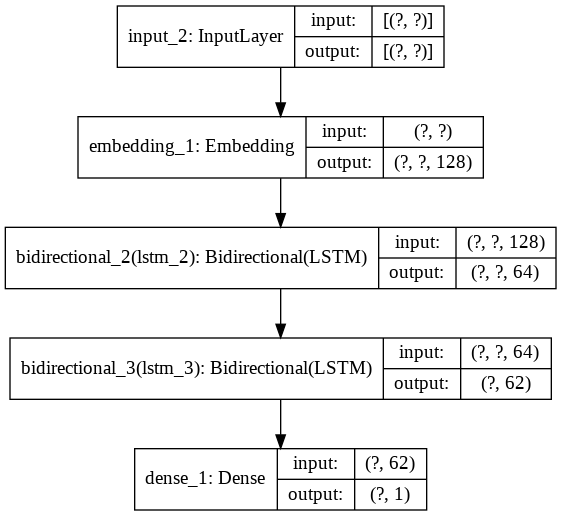

In [5]:
utils.plot_model(model, show_shapes=True)

## Load the IMDB movie review sentiment data

In [6]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.imdb.load_data(
    num_words=max_features,
    #當字數內
    start_char=1, # start tag index <start>=1
    oov_char=2, # out-of-vocabulary index <oov>=2=罕見字
    index_from=3, # index of actual word starts <PAD>=0 補不足的字元補成0
)

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
len(x_train[1])

189

In [9]:
word2index = tf.keras.datasets.imdb.get_word_index() # word -> index
word2index = {k: v+INDEX_FROM for k,v in word2index.items()}
word2index["<PAD>"] = 0
word2index["<START>"] = 1
word2index["<UNK>"] = 2
word2index["<UNUSED>"] = 3
print(word2index)

1646592/1641221 [==============================] - 0s 0us/step
{'fawn': 34704, 'tsukino': 52009, 'nunnery': 52010, 'sonja': 16819, 'vani': 63954, 'woods': 1411, 'spiders': 16118, 'hanging': 2348, 'woody': 2292, 'trawling': 52011, "hold's": 52012, 'comically': 11310, 'localized': 40833, 'disobeying': 30571, "'royale": 52013, "harpo's": 40834, 'canet': 52014, 'aileen': 19316, 'acurately': 52015, "diplomat's": 52016, 'rickman': 25245, 'arranged': 6749, 'rumbustious': 52017, 'familiarness': 52018, "spider'": 52019, 'hahahah': 68807, "wood'": 52020, 'transvestism': 40836, "hangin'": 34705, 'bringing': 2341, 'seamier': 40837, 'wooded': 34706, 'bravora': 52021, 'grueling': 16820, 'wooden': 1639, 'wednesday': 16821, "'prix": 52022, 'altagracia': 34707, 'circuitry': 52023, 'crotch': 11588, 'busybody': 57769, "tart'n'tangy": 52024, 'burgade': 14132, 'thrace': 52026, "tom's": 11041, 'snuggles': 52028, 'francesco': 29117, 'complainers': 52030, 'templarios': 52128, '272': 40838, '273': 52031, 'zani

In [10]:
index2word = {v: k for k, v in word2index.items()} # index -> word
print(index2word)

{34704: 'fawn', 52009: 'tsukino', 52010: 'nunnery', 16819: 'sonja', 63954: 'vani', 1411: 'woods', 16118: 'spiders', 2348: 'hanging', 2292: 'woody', 52011: 'trawling', 52012: "hold's", 11310: 'comically', 40833: 'localized', 30571: 'disobeying', 52013: "'royale", 40834: "harpo's", 52014: 'canet', 19316: 'aileen', 52015: 'acurately', 52016: "diplomat's", 25245: 'rickman', 6749: 'arranged', 52017: 'rumbustious', 52018: 'familiarness', 52019: "spider'", 68807: 'hahahah', 52020: "wood'", 40836: 'transvestism', 34705: "hangin'", 2341: 'bringing', 40837: 'seamier', 34706: 'wooded', 52021: 'bravora', 16820: 'grueling', 1639: 'wooden', 16821: 'wednesday', 52022: "'prix", 34707: 'altagracia', 52023: 'circuitry', 11588: 'crotch', 57769: 'busybody', 52024: "tart'n'tangy", 14132: 'burgade', 52026: 'thrace', 11041: "tom's", 52028: 'snuggles', 29117: 'francesco', 52030: 'complainers', 52128: 'templarios', 40838: '272', 52031: '273', 52133: 'zaniacs', 34709: '275', 27634: 'consenting', 40839: 'snuggle

In [11]:
index2word[6]

'a'

In [13]:
idx = np.random.randint(0, x_train.shape[0])
label = y_train[idx]
comment = x_train[idx]
print(f'idx: {idx}')
print('comment: ', comment)
label

idx: 3147
comment:  [1, 54, 14, 22, 299, 23, 699, 25, 238, 181, 8, 607, 44, 1552, 234, 7, 129, 58, 5, 653, 4, 1308, 225, 164, 318, 133, 15, 25, 359, 8, 67, 65, 9, 44, 107, 1021, 4620, 39, 2, 37, 140, 23, 6, 1189, 295, 8, 8832, 378, 612, 31, 9, 2, 4875, 2, 1514, 2046, 12198, 37, 9, 6, 519, 6409, 5, 260, 712, 19, 27, 1349, 27, 322, 9, 12572, 8627, 4798, 5, 59, 47, 6, 364, 532, 652, 7, 765, 5, 36, 774, 77, 4691, 11, 6, 196, 58, 2, 47, 77, 2765, 19, 1911, 16160, 12836, 37, 9, 4, 322, 7, 27, 118, 464, 2356, 2, 2329, 10898, 36, 32, 1278, 8, 8832, 5, 4, 689, 7, 98, 789, 11, 31, 14533, 10873, 2356, 5, 1911, 28, 77, 269, 8, 28, 6, 896, 5, 417, 1911, 2147, 15, 59, 9, 2755, 21, 2356, 7311, 27, 1042, 11, 2, 5, 659, 46, 15, 240, 10236, 1911, 5, 2, 974, 68, 1586, 5, 150, 4, 226, 1189, 9, 11, 4117, 14, 22, 9, 526, 34, 6087, 4143, 5, 240, 93, 6, 171, 85, 364, 352, 108, 21, 14, 9, 27, 86, 19, 6, 177, 14, 1159, 472, 4143, 152, 123, 76, 1717, 5177, 21, 25, 191, 4585, 32, 4, 1821, 23, 90, 14, 229, 9, 43, 

0

In [14]:
comment_words = [index2word[c] for c in comment]
' '.join(comment_words)

"<START> when this film plays on television you might want to save about 90 minutes of your time and change the channel there's nothing special here that you need to see story is about two married couples from <UNK> who go on a trip together to reno couple number one is <UNK> earl <UNK> billy bob thornton who is a car dealer and having problems with his marriage his wife is darlene natasha richardson and she has a low self opinion of herself and they haven't been intimate in a long time <UNK> has been sleeping with candy charlize theron who is the wife of his best friend roy <UNK> patrick swayze they all drive to reno and the four of them stay in one luxurious suite roy and candy have been trying to have a baby and finally candy discovers that she is pregnant but roy phones his doctor in <UNK> and finds out that he's sterile candy and <UNK> admit their affair and now the whole trip is in chaos this film is directed by jordan brady and he's made a few other low budget films but this is 

In [15]:
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

25000 Training sequences
25000 Validation sequences


((25000, 200), (25000, 200), (25000,), (25000,))

In [16]:
x_train[5566]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,  5092,  3977,
          80,   242,    30,     4,    64,   155,  1081,    11,   745,
       15808,   162,  7421,     4,   360,     9,   162,     8,  1966,
        1221,  2280,   479,     5,    86,  6218,  1181,    10,    10,
        3180,  7601,     9,     6,   641,  5151,     7,    89,    35,
         132,   385,     8,    30,  5374,    83,     4,     2,     7,
        5966, 16705,  2799,     5,  7656,     2,  2740,   159,    12,
         877,  4103,  2296,     8,    81,    38,     4,    22,  1367,
           6,   119,    65,     6,  1515,   749,     5,     6,   132,
        3810,    34,

## Train and evaluate the model

In [17]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
196/196 [==============================] - 16s 84ms/step - loss: 0.4034 - accuracy: 0.8108 - val_loss: 0.3052 - val_accuracy: 0.8722
Epoch 2/5
196/196 [==============================] - 15s 77ms/step - loss: 0.1842 - accuracy: 0.9338 - val_loss: 0.3217 - val_accuracy: 0.8603
Epoch 3/5
196/196 [==============================] - 15s 77ms/step - loss: 0.1038 - accuracy: 0.9644 - val_loss: 0.3993 - val_accuracy: 0.8607
Epoch 4/5
196/196 [==============================] - 15s 77ms/step - loss: 0.0679 - accuracy: 0.9781 - val_loss: 0.4462 - val_accuracy: 0.8540
Epoch 5/5
196/196 [==============================] - 15s 77ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.5616 - val_accuracy: 0.8525


In [ ]:
# tf.keras.datasets.reuters.load_data()